# Covid Analysis

### Importing the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

In [ ]:
us = pd.read_csv ("us-counties.csv")
us.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1.0,0.14,0.02,0.0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1.0,0.14,0.00,0.0,0.0,0.0


In [ ]:
mean = us['cases_avg_per_100k'].mean()
us['cases_avg_per_100k'].fillna(mean,inplace=True)
mean1 = us['deaths_avg_per_100k'].mean()
us['deaths_avg_per_100k'].fillna(mean,inplace=True)

us.dropna(inplace=True)

In [ ]:
us.isnull().sum()

date                   0
geoid                  0
county                 0
state                  0
cases                  0
cases_avg              0
cases_avg_per_100k     0
deaths                 0
deaths_avg             0
deaths_avg_per_100k    0
dtype: int64

In [ ]:
us.nunique()

date                     77
geoid                  2468
county                 1503
state                    55
cases                   451
cases_avg              1054
cases_avg_per_100k     1759
deaths                   77
deaths_avg              165
deaths_avg_per_100k     238
dtype: int64

In [ ]:
us.shape

(36673, 10)

In [ ]:
world = pd.read_csv("all_weekly_excess_deaths.csv")
world.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020-01-07,7,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.0,0.131687,0.013758
1,Australia,Australia,0,2020-01-08,2020-01-14,7,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.0,0.200985,0.021040
2,Australia,Australia,0,2020-01-15,2020-01-21,7,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.0,0.250854,0.026496
3,Australia,Australia,0,2020-01-22,2020-01-28,7,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.0,0.623252,0.065824
4,Australia,Australia,0,2020-01-29,2020-02-04,7,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.0,0.326629,0.034648


In [ ]:
world.isnull().sum()

country                     0
region                      0
region_code                 0
start_date                  0
end_date                    0
days                        0
year                        0
week                        0
population                  0
total_deaths                0
covid_deaths                0
expected_deaths             0
excess_deaths               0
non_covid_deaths            0
covid_deaths_per_100k       0
excess_deaths_per_100k      0
excess_deaths_pct_change    0
dtype: int64

In [ ]:
world.nunique()

country                        45
region                        176
region_code                   116
start_date                    281
end_date                      333
days                            3
year                            2
week                           53
population                    178
total_deaths                 3855
covid_deaths                 1348
expected_deaths             11220
excess_deaths               10901
non_covid_deaths             3618
covid_deaths_per_100k        7162
excess_deaths_per_100k      11462
excess_deaths_pct_change    11573
dtype: int64

In [ ]:
world.shape

(11715, 17)

### Visualization

Pairplots to see correlation between the different columns in the USA dataset

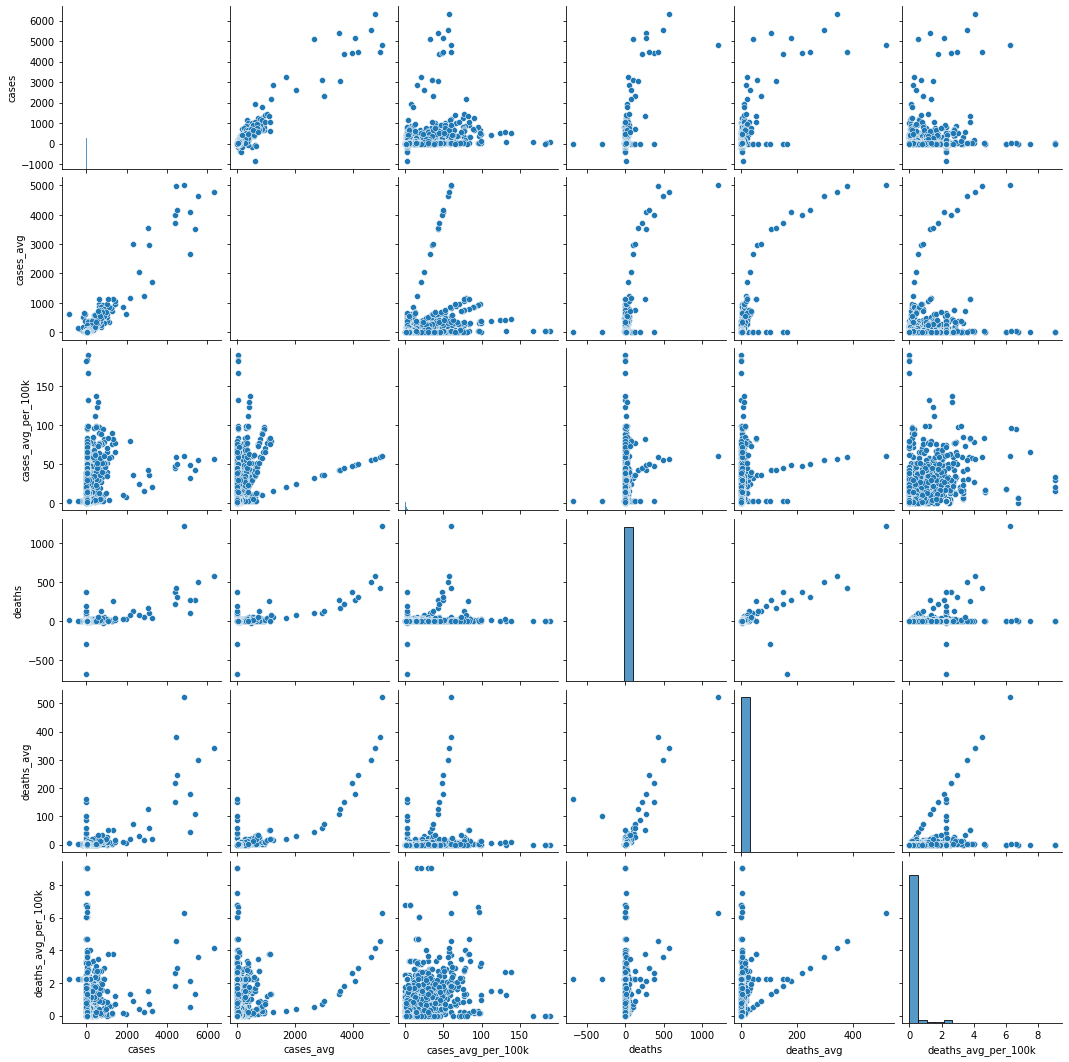

In [ ]:
sns.pairplot(us)

From the below correlation matrix we get to know that there is a high correlation between deaths and cases in USA



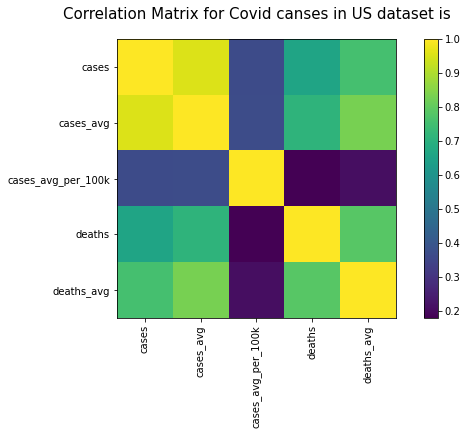

In [ ]:
us1 = us.iloc[:,4:9]
corr = us1.corr()
plt.figure(figsize=(10,5))
corMat = plt.matshow(corr,fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corMat)
plt.title(f'Correlation Matrix for Covid canses in US dataset is', fontsize=15)
plt.show()

The below visualization lets us know that washington had to most number cases in USA

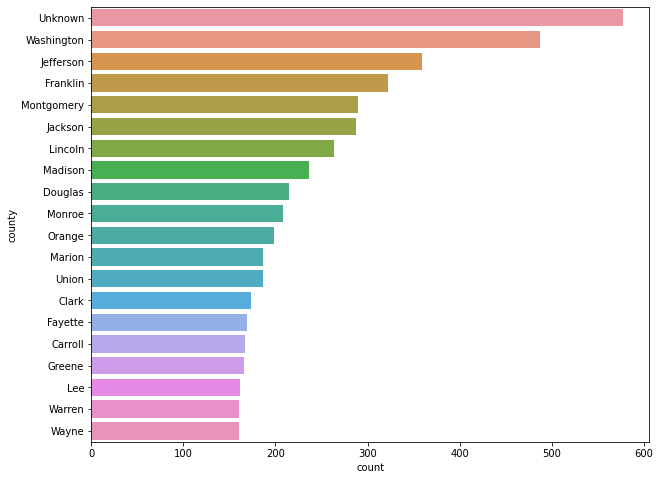

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=us,y="county",order=dict(Counter(us['county']).most_common(20)))
plt.show()

The below visualization lets us know that United States had to most number cases in the World

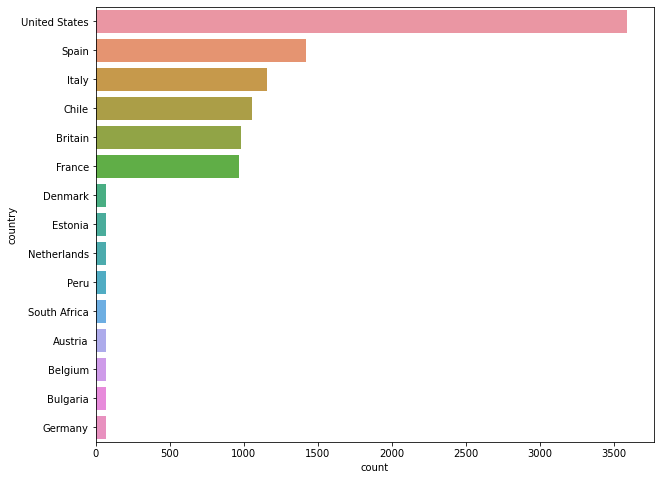

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=world,y="country",order=dict(Counter(world['country']).most_common(15)))
plt.show()

Time Series analysis for covid cases in the world

In [ ]:
temp = world['end_date'].str.split('-', expand=True)[[1,0]]
world['Date'] = temp[1] + '/' + temp[0]

fig = px.choropleth(world,
                    locations = "country",
                    locationmode= "country names",
                    color = "covid_deaths",
                    animation_frame='Date'
)

fig.update_layout(geo=dict(
                  showframe = False,
                  showcoastlines = False)
                )
fig.show()

Time Series analysis for covid cases in USA

In [ ]:
df_USA = world[world['country']=='United States']
fig = px.choropleth(df_USA[df_USA['region_code']!='USA'],
                    locations = "region_code",
                    locationmode= "USA-states",
                    color = "covid_deaths",
                    animation_frame='Date',
                    scope="usa"
)

fig.update_layout(geo=dict(
                  showframe = False,
                  showcoastlines = False)
                )
fig.show()

Bar graph showing total deaths to the number of deaths due to covid

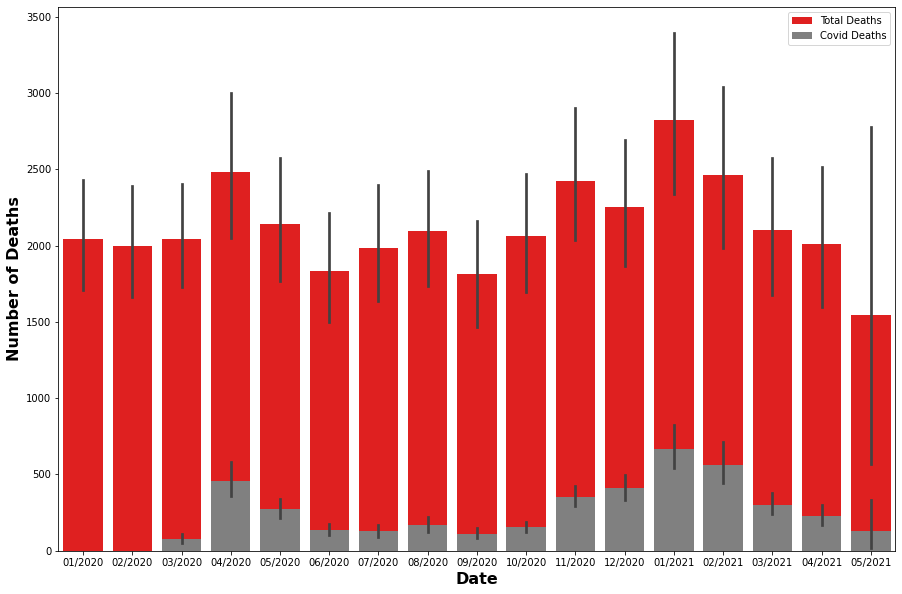

In [ ]:
plt.figure(figsize = (15, 10))

sns.barplot(data=world,x="Date",y="total_deaths",color="red",label = 'Total Deaths')
sns.barplot(data=world,x="Date",y="covid_deaths",color="grey",label = 'Covid Deaths')

plt.xlabel(xlabel = 'Date', fontsize = 16, fontweight = 'bold')
plt.ylabel(ylabel = 'Number of Deaths', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()

Bar graph showing total covid cases to the number of deaths due to covid

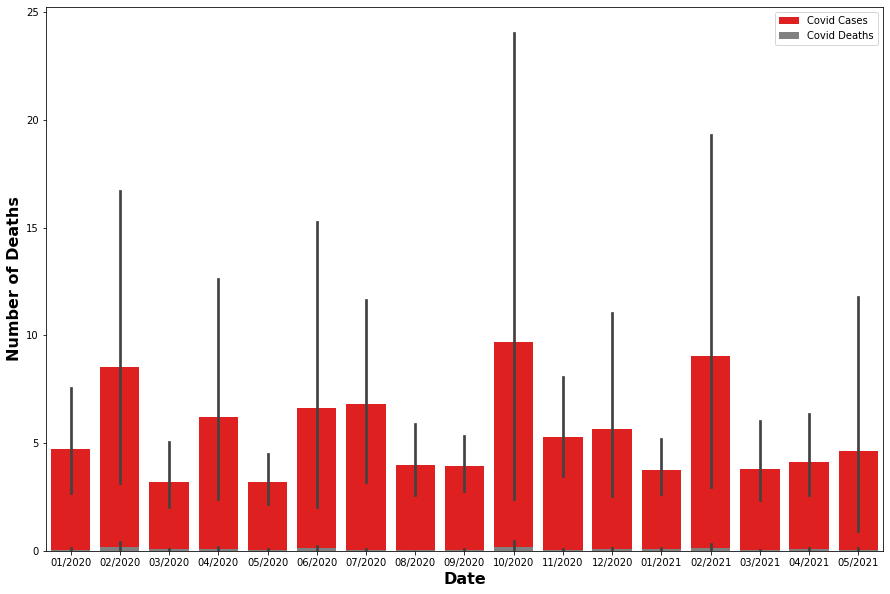

In [ ]:
us['Date'] = temp[1] + '/' + temp[0]

plt.figure(figsize = (15, 10))

sns.barplot(data=us,x="Date",y="cases",color="red",label = 'Covid Cases')
sns.barplot(data=us,x="Date",y="deaths",color="grey",label = 'Covid Deaths')

plt.xlabel(xlabel = 'Date', fontsize = 16, fontweight = 'bold')
plt.ylabel(ylabel = 'Number of Deaths', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()